# Portfolio assignment week 7

## 1. Bagging vs Boosting
The scikit-learn library provides several options for bagging and boosting. It is possible to create your own boosting model based on a base model. For instance, you can create a tree based bagging model. In addition, scikit-learn provides AdaBoost. For XGBoost it is best to use the xgboost library.

Based on the theory in the [accompanying notebook](../Exercises/E_BAGGING_BOOSTING.ipynb), create a bagging, boosting and dummy classifier. Test these classifiers on the [breast cancer dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset). Go through the data science pipeline as you've done before:

1. Try to understand the dataset globally.
2. Load the data.
3. Exploratory analysis
4. Preprocess data (skewness, normality, etc.)
5. Modeling (cross-validation and training)
6. Evaluation
7. Try to understand why some methods perform better than others. Try different configurations for your bagging and boosting models.

In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [40]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
print(df.shape)
print(df.info(),"\n",75*"_")
print(df.describe(),"\n",75*"_")
print("nulls : ",df.isnull().sum().sum())

(569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se    

In [42]:
df.drop("id",axis=1,inplace=True)

In [44]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [45]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [46]:
def skew_value():
    c=[]
    for a,b in zip(df.skew(),df.skew().index.tolist()):
        if a>1 : 
            c.append(b)
    return c
skewed = skew_value()

In [47]:
#It's recommended to apply scaling or normalization to the data prior to creating a model.

df[skewed].skew()

area_mean                  1.645732
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
perimeter_worst            1.128164
area_worst                 1.859373
compactness_worst          1.473555
concavity_worst            1.150237
symmetry_worst             1.433928
fractal_dimension_worst    1.662579
dtype: float64

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df.drop('diagnosis',axis=1)).transform(df.drop('diagnosis',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df.columns[1:])
df_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [49]:
x = df_scaled
y = df['diagnosis']

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Predictive Modeling
Following algorithms are for making the model:

Logistic Regression

Support Vector Machines(Linear and radial)

Random Forest

Naive Bayes

Decision Tree

Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix 

#### Radial Support Vector Machines(rbf-SVM)

In [52]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(x_train,y_train)
prediction1=model.predict(x_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is  0.9649122807017544


#### Linear Support Vector Machine(linear-SVM)

In [53]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(x_train,y_train)
prediction2=model.predict(x_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,y_test))

Accuracy for linear SVM is 0.9707602339181286


#### Logistic Regression

In [54]:
model = LogisticRegression()
model.fit(x_train,y_train)
prediction3=model.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the Logistic Regression is 0.9766081871345029


#### Decision Tree

In [55]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction4=model.predict(x_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.9298245614035088


#### Gaussian Naive Bayes

In [56]:
model=GaussianNB()
model.fit(x_train,y_train)
prediction5=model.predict(x_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the NaiveBayes is 0.9122807017543859


#### Random Forests

In [57]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
prediction6=model.predict(x_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,y_test))


The accuracy of the Random Forests is 0.9649122807017544


The strength of a classifier isn't solely determined by its accuracy. For instance, when a classifier is trained on one set of training data and tested on another set of testing data, its accuracy can vary. This variance in accuracy, whether it rises or falls, is referred to as model variance. To counteract this and achieve a more universal model, cross-validation can be employed.

### Cross validation

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=10) parts. 

3)continue the cross validation over each model by changing the testing part in each iteration and training the model

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [58]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits=10, random_state=22,shuffle=True) # k=10, split the data into 10 equal parts
mean=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=7),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,x,y, cv = kfold,scoring = "accuracy")
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
model_df=pd.DataFrame({'CV Mean':mean,'Std':std},index=classifiers)       
model_df

,CV Mean,Std
Linear Svm,0.970019,0.025239
Radial Svm,0.978853,0.015490
Logistic Regression,0.982393,0.020812
KNN,NaN,NaN
Decision Tree,0.920802,0.039820
Naive Bayes,0.927851,0.039867
Random Forest,0.964787,0.023727


<AxesSubplot:>

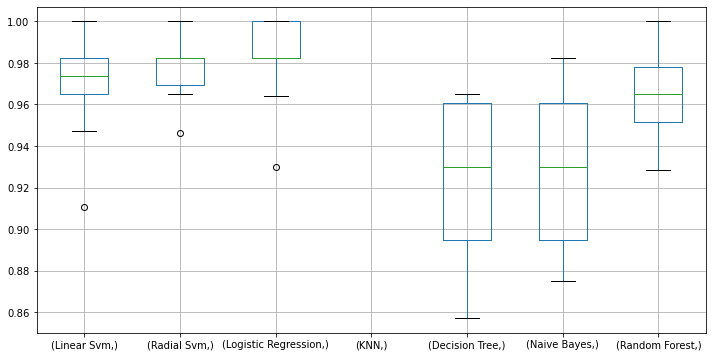

In [59]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

A concise outcome can be obtained using a confusion matrix, which highlights instances where the model made errors or mispredicted specific classes.

### Confusion Matrix

Correct and incorrect classifications 

In [66]:
def plot_confusion_matrices(classifiers, x, y):
    num_classifiers = len(classifiers)
    num_rows = (num_classifiers + 2) // 3  # Adjusting the number of rows based on the number of classifiers
    fig, axes = plt.subplots(num_rows, 3, figsize=(14, 8))
    axes = axes.flatten()  # Flattening the axes to access them sequentially

    for i, clf in enumerate(classifiers):
        y_pred = cross_val_predict(clf, x, y, cv=10)
        ax = axes[i]
        sns.heatmap(confusion_matrix(y, y_pred), ax=ax, annot=True, fmt='2.0f',cmap='RdYlGn')
        ax.set_title(f"Matrix for {clf.__class__.__name__}")

    # Remove any empty subplots
    for j in range(num_classifiers, len(axes)):
        fig.delaxes(axes[j])

    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

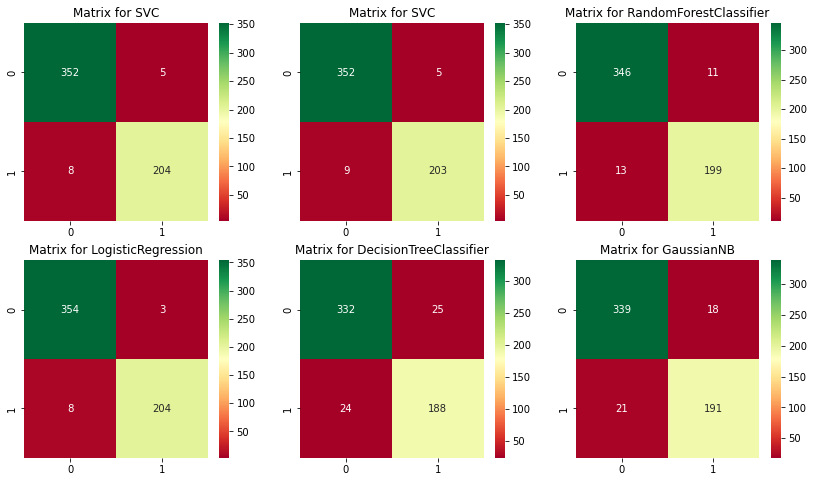

In [67]:
classifiers = [
    svm.SVC(kernel='rbf'),
    svm.SVC(kernel='linear'),
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB()
]

plot_confusion_matrices(classifiers, x, y)

Analyzing the Confusion Matrix:
The main diagonal on the left showcases the count of accurate predictions for each class, while the diagonal on the right displays the count of incorrect predictions. Taking the first plot for Logistic Regression as an example:

The total correct predictions are 354 for diagnosis(B) and 204 for diagnosis(M), resulting in a mean cross-validation accuracy of (354+204)/569 = 98.06%, which aligns closely with our previous approximation.

Errors --> Misclassified 3 instances of diagnosis(B) as diagnosis(M) and 8 instances of diagnosis(M) as diagnosis(B).

After examining all the matrices, we can deduce that Logistic Regression exhibits the highest potential for accurately predicting both diagnosis(B) and diagnosis(M).

### Hyper-Parameters Tuning

We can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests

#### SVM with GridSearchCV

In [68]:
#will try every possible value for C and gamma
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(x,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.9789163173420278
SVC(C=0.05, gamma=0.1, kernel='linear')


#### RandomForest with GridSearchCV

In [69]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(x,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.9648657040832169
RandomForestClassifier(random_state=0)


The best score for linear-Svm is 97.89% with C=0.05 and gamma=0.1. For RandomForest, score is about 96.48%

### Ensembling
Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.
Based on various parameter we can make a strong judgement about a single model after analysing all different parameters. This is Ensembling, which improves the stability of the model.
Ensembling can be done in ways like:
1) Bagging

2) Boosting

#### Bagging

Bagging is a powerful technique in data modeling that enhances the stability and predictive performance of machine learning models by combining multiple models trained on different subsets of the data.It uses decision trees as the base models and combines their predictions through averaging (for regression) or voting (for classification).

#### Boosting

Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model.

In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analyzing data for errors. In other words, we fit consecutive trees (random sample) and at every step, the goal is to solve for net error from the prior tree.

In [74]:
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              AdaBoostClassifier)

from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [71]:
models = [RandomForestClassifier(random_state=77),
          GradientBoostingClassifier(random_state=77),
          AdaBoostClassifier(random_state=77)]
from sklearn.model_selection import cross_val_score, GridSearchCV

for model in models:
    score = cross_val_score(model, x, y, cv=10)
    report = ("{0}:\n\tCross validated score\t= {1:.3f} "
           "(+/- {2:.3f})".format(model.__class__.__name__,
                                  score.mean(),
                                  score.std()))
    print(report)

# Fit the model on the dev set and predict and eval independent set
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    acc_eval = accuracy_score(y_test, prediction)
    print("\tAccuracy score\t\t= {0:.3f}".format(acc_eval))

RandomForestClassifier:
	Cross validated score	= 0.963 (+/- 0.035)
	Accuracy score		= 0.959
GradientBoostingClassifier:
	Cross validated score	= 0.961 (+/- 0.029)
	Accuracy score		= 0.971
AdaBoostClassifier:
	Cross validated score	= 0.961 (+/- 0.028)
	Accuracy score		= 0.965


In [75]:
# Import time module in order to get the time spent by GridSearchCV

import time
dict_classifier = {}

# Random Forest
paramgrid = {
    'n_estimators':      [100, 200, 500, 750, 1000],
    'criterion':         ['gini', 'entropy'],
    'max_features':      ['auto', 'log2'],
    'min_samples_leaf':  list(range(2, 7))
}
GS = GridSearchCV(RandomForestClassifier(random_state=22),
                  paramgrid,
                  cv=4)
t = time.time()
GS.fit(x_train, y_train)
time = time.time() - t
best_clf = GS.best_estimator_
best_params = GS.best_params_
best_score = GS.best_score_
name = 'RF'
best_clf.fit(x_train, y_train)
acc_eval = accuracy_score(y_test, best_clf.predict(x_test))
dict_classifier[name] = {
    'best_par': best_params,
    'best_clf': best_clf,
    'best_score': best_score,
    'score_eval': acc_eval,
    'fit_time': time,
}

C:\Users\hassa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hassa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hassa\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\hassa\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hassa\anaconda3\lib\site-packag

In [30]:
# Gradient Boost
import time

paramgrid = {
    'n_estimators':      [100, 200, 500, 750, 1000],
    'max_features':      ['auto', 'log2'],
    'min_samples_leaf':  list(range(2, 7)),
    'loss' :             ['deviance', 'exponential'],
    'learning_rate':     [0.05, 0.1, 0.2],
}
GS = GridSearchCV(GradientBoostingClassifier(random_state=22),
                  paramgrid,
                  cv=4)
t = time.time()
GS.fit(x_train, y_train)
time = time.time() - t
best_clf = GS.best_estimator_
best_params = GS.best_params_
best_score = GS.best_score_
name = 'GB'
best_clf.fit(x_train, y_train)
acc_eval = accuracy_score(y_test, best_clf.predict(x_test))
dict_classifier[name] = {
    'best_par': best_params,
    'best_clf': best_clf,
    'best_score': best_score,
    'score_eval': acc_eval,
    'fit_time': time,
}

C:\Users\hassa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
900 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hassa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hassa\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\hassa\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hassa\anaconda3\lib\site-packa

In [76]:
# ADA Boost
import time

paramgrid = {
    'n_estimators':  [100, 200, 500, 750, 1000],
    'learning_rate': [0.05, 0.1, 0.5, 1, 2]
}
GS = GridSearchCV(AdaBoostClassifier(random_state=22),
                  paramgrid,
                  cv=4)
t = time.time()
GS.fit(x_train, y_train)
time = time.time() - t
best_clf = GS.best_estimator_
best_params = GS.best_params_
best_score = GS.best_score_
name = 'ADB'
best_clf.fit(x_train, y_train)
acc_eval = accuracy_score(y_test, best_clf.predict(x_test))
dict_classifier[name] = {
    'best_par': best_params,
    'best_clf': best_clf,
    'best_score': best_score,
    'score_eval': acc_eval,
    'fit_time': time,
}


In [77]:
for classifier in dict_classifier.keys():
    print("{0} classifier:\n\t- Best score = {1:.2%}".format(classifier, dict_classifier[classifier]['best_score']))
    print("\t- Score on evaluation set = {0:.2%}".format(dict_classifier[classifier]['score_eval']))
    print("\t- Fitting time = {0:.1f} min".format(round(dict_classifier[classifier]['fit_time']/60, 1)))
    print("\t- Best parameters:")
    for parameter in sorted(dict_classifier[classifier]['best_par'].keys()):
        print("\t\t* {0}: {1}".format(parameter, dict_classifier[classifier]['best_par'][parameter]))

RF classifier:
	- Best score = 95.73%
	- Score on evaluation set = 97.08%
	- Fitting time = 2.5 min
	- Best parameters:
		* criterion: entropy
		* max_features: log2
		* min_samples_leaf: 2
		* n_estimators: 100
ADB classifier:
	- Best score = 96.99%
	- Score on evaluation set = 98.83%
	- Fitting time = 2.5 min
	- Best parameters:
		* learning_rate: 1
		* n_estimators: 1000


Among the classifiers tested, the Gradient Boosting (GB) model demanded the most time for fitting, whereas the AdaBoost (ADB) model accomplished the fitting process in a quick 1.8 seconds. The RandomForestClassifier (utilizing bagging) and the ADB classifier (leveraging boosting) showcased superior ratios for both the best score and evaluation score. Ultimately, following hyperparameter tuning with GridSearchCV, the ADB classifier emerged as the most precise and accurate model.

### Confusion Matrix for the Best Model

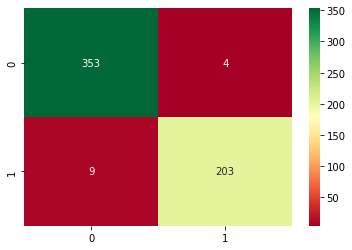

In [78]:
# Fine-tuning the AdaBoost (ADB) classifier using the optimal parameters obtained from the previous hyperparameter tuning methods.
ada=AdaBoostClassifier(n_estimators=1000,random_state=22,learning_rate=1)
result=cross_val_predict(ada,x,y,cv=4)
sns.heatmap(confusion_matrix(y,result),cmap='RdYlGn',annot=True,fmt='2.0f')
plt.show()

Text(0.5, 1.0, 'Feature Importance in AdaBoost')

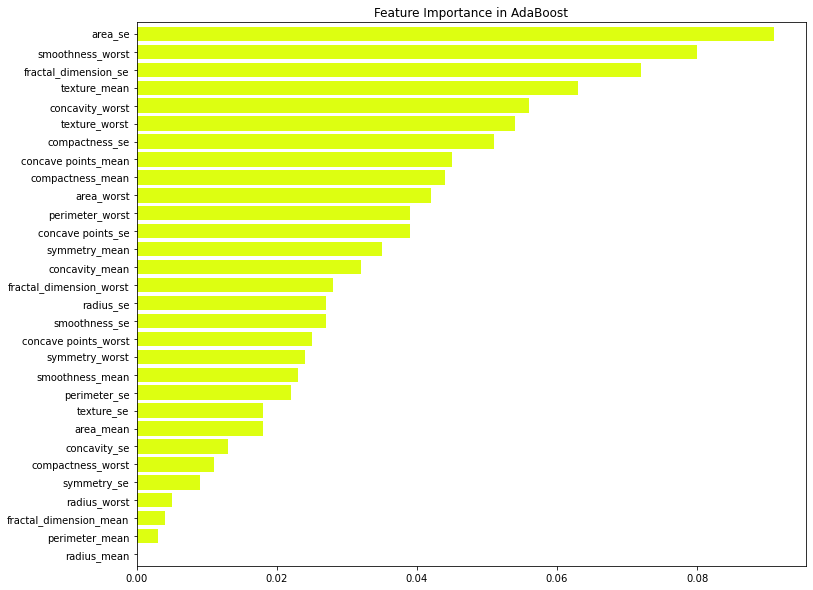

In [79]:
f,ax=plt.subplots(figsize=(12,10))
model=AdaBoostClassifier(n_estimators=1000,learning_rate=1,random_state=22)
model.fit(x,y)
pd.Series(model.feature_importances_,x.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax,color='#ddff11')
ax.set_title('Feature Importance in AdaBoost')

#### Observations:
By analyzing the feature importance scores from AdaBoost, you can identify the key attributes that strongly influence the model's decision-making process. This information is invaluable for feature selection, understanding the underlying dynamics of the dataset, and potentially improving the model's performance by focusing on the most impactful features.
